In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("crime.csv")

In [3]:
data.head(5)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,Andhra Pradesh,ADILABAD,2013,96,72,13,61,0,61,65,...,30,2394,12,197,138,464,0,376,1390,6381
1,Andhra Pradesh,ANANTAPUR,2013,156,149,3,28,0,28,110,...,29,2537,23,337,43,161,0,573,1634,6913
2,Andhra Pradesh,CHITTOOR,2013,72,61,2,31,0,31,52,...,18,937,13,119,84,435,0,546,2239,5610
3,Andhra Pradesh,CUDDAPAH,2013,93,107,7,19,0,19,84,...,34,2310,9,318,163,207,0,464,1741,7048
4,Andhra Pradesh,CYBERABAD,2013,162,123,16,138,0,138,192,...,40,4284,43,350,338,1526,0,1104,3139,19992


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9840 non-null   object
 1   DISTRICT                                             9840 non-null   object
 2   YEAR                                                 9840 non-null   int64 
 3   MURDER                                               9840 non-null   int64 
 4   ATTEMPT TO MURDER                                    9840 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9840 non-null   int64 
 6   RAPE                                                 9840 non-null   int64 
 7   CUSTODIAL RAPE                                       9840 non-null   int64 
 8   OTHER RAPE                                           9840 non-null   int64 
 9

In [5]:
data.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

In [6]:
data.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [7]:
data['STATE/UT'] = data['STATE/UT'].str.upper()
data['DISTRICT'] = data['DISTRICT'].str.upper()

In [8]:
data['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A&N ISLANDS', 'CHANDIGARH', 'D&N HAVELI',
       'DAMAN & DIU', 'DELHI UT', 'LAKSHADWEEP', 'PUDUCHERRY',
       'A & N ISLANDS', 'D & N HAVELI'], dtype=object)

In [9]:
def state(name):
    state = data.groupby(['STATE/UT','DISTRICT','YEAR']).sum()['TOTAL IPC CRIMES']
    return state[name]

In [10]:
state('MAHARASHTRA')

DISTRICT    YEAR
AHMEDNAGAR  2001      4391
            2002      4506
            2003      4251
            2004      4738
            2005      5241
                     ...  
YAVATMAL    2010      4777
            2011      5008
            2012      6365
            2013     12567
ZZ TOTAL    2013    234385
Name: TOTAL IPC CRIMES, Length: 598, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9840 non-null   object
 1   DISTRICT                                             9840 non-null   object
 2   YEAR                                                 9840 non-null   int64 
 3   MURDER                                               9840 non-null   int64 
 4   ATTEMPT TO MURDER                                    9840 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9840 non-null   int64 
 6   RAPE                                                 9840 non-null   int64 
 7   CUSTODIAL RAPE                                       9840 non-null   int64 
 8   OTHER RAPE                                           9840 non-null   int64 
 9

In [12]:
data.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,...,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000
mean,2007.161890,88.565854,78.738618,9.754878,55.456098,0.005488,55.450610,85.836992,64.184553,21.652439,...,25.012398,753.362805,20.179878,106.482520,27.772967,202.046138,0.187602,226.296951,2214.523171,5404.141463
std,3.755581,325.417692,306.650391,58.733349,201.690457,0.111218,201.676202,354.035359,278.536450,93.769371,...,97.601717,3059.322654,97.446611,423.729483,170.367098,869.325453,2.319261,952.900601,8199.391921,18941.271529
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.000000,10.000000,0.000000,8.000000,0.000000,8.000000,10.000000,6.000000,2.000000,...,2.000000,43.750000,1.000000,10.000000,0.000000,11.000000,0.000000,5.000000,264.000000,857.750000
50%,2007.000000,37.000000,28.000000,2.000000,21.000000,0.000000,21.000000,26.000000,19.000000,5.000000,...,8.000000,199.000000,5.000000,33.000000,2.000000,49.000000,0.000000,70.000000,750.000000,2130.500000
75%,2010.000000,66.000000,57.000000,6.000000,43.000000,0.000000,43.000000,60.000000,46.000000,14.000000,...,19.000000,533.250000,16.000000,80.000000,13.000000,139.250000,0.000000,180.000000,1631.000000,4025.000000
max,2013.000000,7601.000000,7964.000000,1616.000000,4335.000000,5.000000,4335.000000,11183.000000,9737.000000,2685.000000,...,2830.000000,60488.000000,2335.000000,8252.000000,4970.000000,19865.000000,83.000000,16076.000000,127850.000000,234385.000000


In [13]:
data['TOTAL IPC CRIMES'].mean()

5404.141463414634

In [14]:
numeric_data = data.select_dtypes(exclude='object')

In [15]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 31 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   YEAR                                                 9840 non-null   int64
 1   MURDER                                               9840 non-null   int64
 2   ATTEMPT TO MURDER                                    9840 non-null   int64
 3   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9840 non-null   int64
 4   RAPE                                                 9840 non-null   int64
 5   CUSTODIAL RAPE                                       9840 non-null   int64
 6   OTHER RAPE                                           9840 non-null   int64
 7   KIDNAPPING & ABDUCTION                               9840 non-null   int64
 8   KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS          9840 non-null   int64
 9   KIDNAPPI

In [16]:
for col in numeric_data.columns:
    range = data[col].max() - data[col].min()
    print('range of %s : %d'%(col,range))

range of YEAR : 12
range of MURDER : 7601
range of ATTEMPT TO MURDER : 7964
range of CULPABLE HOMICIDE NOT AMOUNTING TO MURDER : 1616
range of RAPE : 4335
range of CUSTODIAL RAPE : 5
range of OTHER RAPE : 4335
range of KIDNAPPING & ABDUCTION : 11183
range of KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS : 9737
range of KIDNAPPING AND ABDUCTION OF OTHERS : 2685
range of DACOITY : 1319
range of PREPARATION AND ASSEMBLY FOR DACOITY : 1263
range of ROBBERY : 9746
range of BURGLARY : 18328
range of THEFT : 53449
range of AUTO THEFT : 24948
range of OTHER THEFT : 35960
range of RIOTS : 11931
range of CRIMINAL BREACH OF TRUST : 4296
range of CHEATING : 22796
range of COUNTERFIETING : 599
range of ARSON : 2830
range of HURT/GREVIOUS HURT : 60488
range of DOWRY DEATHS : 2335
range of ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY : 8252
range of INSULT TO MODESTY OF WOMEN : 4970
range of CRUELTY BY HUSBAND OR HIS RELATIVES : 19865
range of IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES : 83
ran

In [17]:
percentiles = data.describe(percentiles=[.01, .25, .5, .75, .99]).transpose()[["1%", "25%", "50%", "75%", "99%"]]
percentiles

,1%,25%,50%,75%,99%
YEAR,2001.0,2004.00,2007.0,2010.00,2013.00
MURDER,0.0,18.00,37.0,66.00,1592.83
ATTEMPT TO MURDER,0.0,10.00,28.0,57.00,1562.49
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,0.0,0.00,2.0,6.00,108.22
RAPE,0.0,8.00,21.0,43.00,1024.22
CUSTODIAL RAPE,0.0,0.00,0.0,0.00,0.00
OTHER RAPE,0.0,8.00,21.0,43.00,1024.22
KIDNAPPING & ABDUCTION,0.0,10.00,26.0,60.00,1423.67
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,0.0,6.00,19.0,46.00,1056.25
KIDNAPPING AND ABDUCTION OF OTHERS,0.0,2.00,5.0,14.00,357.05


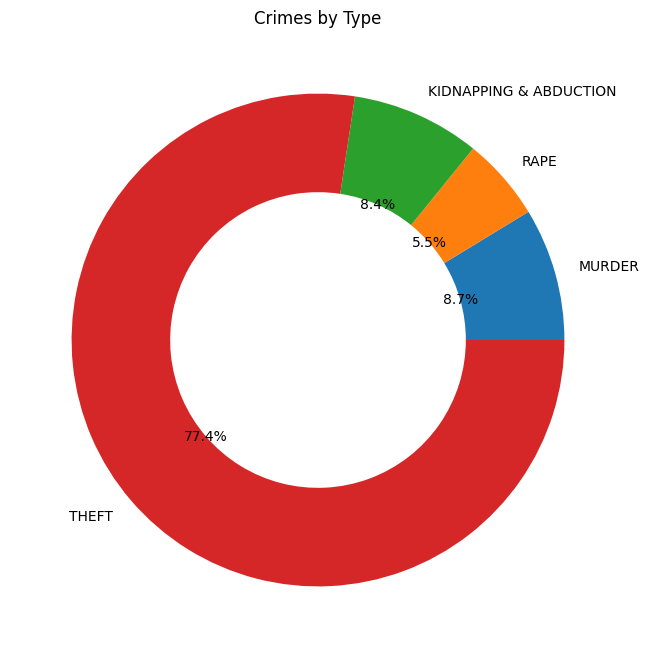

In [18]:
import matplotlib.pyplot as plt
crime_totals = data[['MURDER', 'RAPE', 'KIDNAPPING & ABDUCTION', 'THEFT']].sum()
plt.figure(figsize=(10, 8))
plt.pie(crime_totals.values, labels=crime_totals.index, autopct='%1.1f%%', wedgeprops=dict(width=0.4))
plt.title('Crimes by Type')
plt.gca().add_artist(plt.Circle((0,0),0.3,fc='white')) 
plt.show()

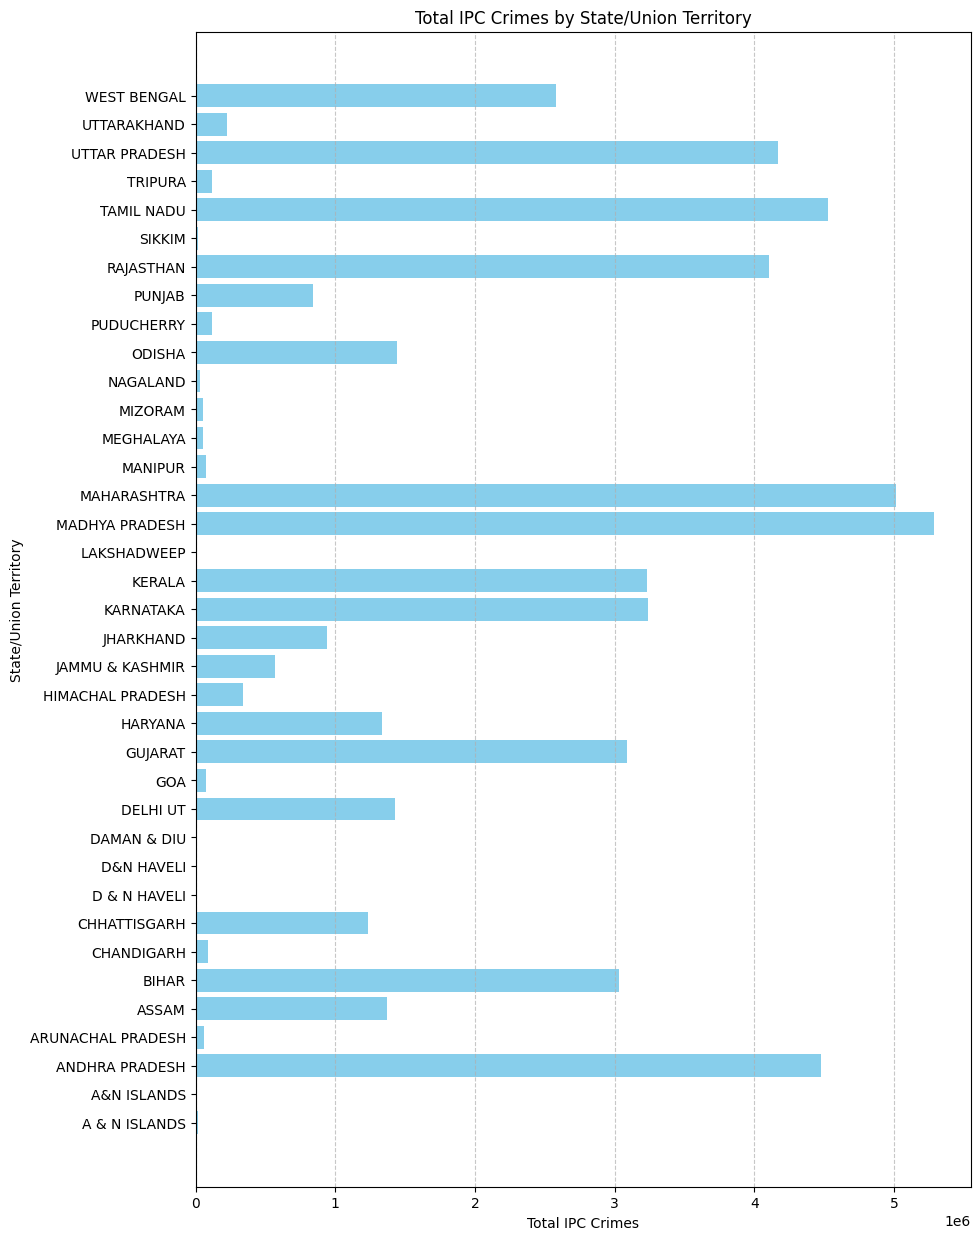

In [19]:
import matplotlib.pyplot as plt

state_totals = data.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum()

plt.figure(figsize=(10, 15)) 
plt.barh(state_totals.index, state_totals.values, color='skyblue') 
plt.xlabel('Total IPC Crimes')
plt.ylabel('State/Union Territory')
plt.title('Total IPC Crimes by State/Union Territory')
plt.grid(axis='x', linestyle='--', alpha=0.7)  
plt.show()

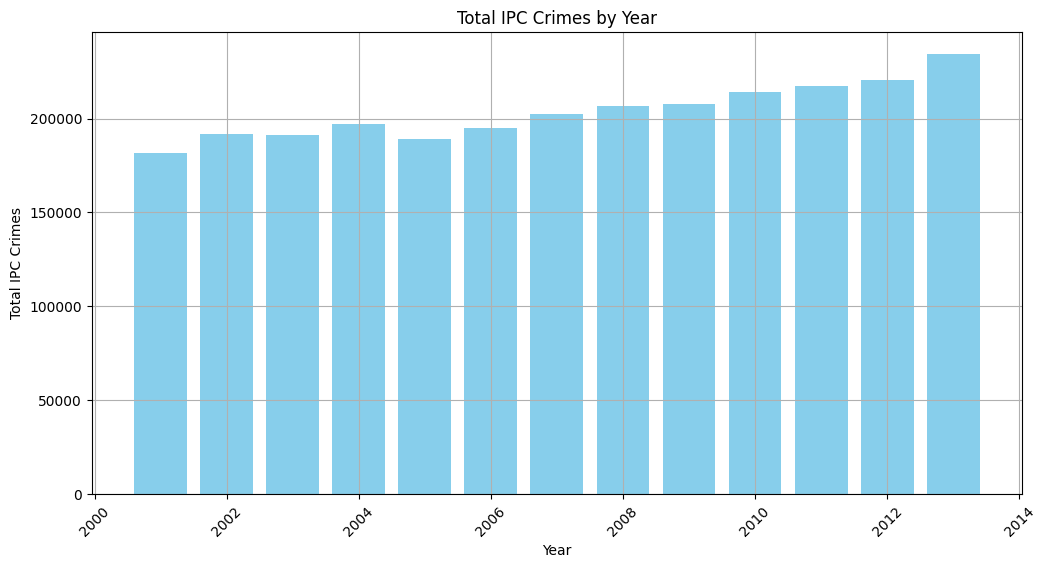

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(data['YEAR'], data['TOTAL IPC CRIMES'], color='skyblue')
plt.title('Total IPC Crimes by Year')
plt.xlabel('Year')
plt.ylabel('Total IPC Crimes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [21]:
data.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [22]:
min_val = data['TOTAL IPC CRIMES'].min()
max_val = data['TOTAL IPC CRIMES'].max()
range_val = (max_val - min_val) / 4
low = min_val + range_val
medium = low + range_val
high = medium + range_val

In [23]:
def get_crime_level(crime_count):
    if crime_count <= low:
        return 1
    elif crime_count <= medium:
        return 2
    elif crime_count <= high:
        return 3
    else:
        return 4

data['CRIME_LEVEL'] = data['TOTAL IPC CRIMES'].apply(get_crime_level)

In [24]:
data

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,CRIME_LEVEL
0,ANDHRA PRADESH,ADILABAD,2013,96,72,13,61,0,61,65,...,2394,12,197,138,464,0,376,1390,6381,1
1,ANDHRA PRADESH,ANANTAPUR,2013,156,149,3,28,0,28,110,...,2537,23,337,43,161,0,573,1634,6913,1
2,ANDHRA PRADESH,CHITTOOR,2013,72,61,2,31,0,31,52,...,937,13,119,84,435,0,546,2239,5610,1
3,ANDHRA PRADESH,CUDDAPAH,2013,93,107,7,19,0,19,84,...,2310,9,318,163,207,0,464,1741,7048,1
4,ANDHRA PRADESH,CYBERABAD,2013,162,123,16,138,0,138,192,...,4284,43,350,338,1526,0,1104,3139,19992,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,DELHI UT,WEST,2001,70,51,12,45,0,45,151,...,252,18,65,2,22,0,4,4151,7690,1
9836,LAKSHADWEEP,LAKSHADWEEP,2001,1,0,0,0,0,0,0,...,3,0,0,0,0,0,0,17,36,1
9837,LAKSHADWEEP,TOTAL,2001,1,0,0,0,0,0,0,...,3,0,0,0,0,0,0,17,36,1
9838,PUDUCHERRY,PONDICHERRY,2001,25,32,1,9,0,9,4,...,635,1,35,27,3,0,166,2324,4068,1


In [25]:
crime_level_count = data['CRIME_LEVEL'].value_counts()
crime_level_count

CRIME_LEVEL
1    9685
3      67
2      48
4      40
Name: count, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["STATE/UT_encoded"] = le.fit_transform(data["STATE/UT"])
data["DISTRICT_encoded"] = le.fit_transform(data["DISTRICT"])

In [27]:
data

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,CRIME_LEVEL,STATE/UT_encoded,DISTRICT_encoded
0,ANDHRA PRADESH,ADILABAD,2013,96,72,13,61,0,61,65,...,197,138,464,0,376,1390,6381,1,2,3
1,ANDHRA PRADESH,ANANTAPUR,2013,156,149,3,28,0,28,110,...,337,43,161,0,573,1634,6913,1,2,31
2,ANDHRA PRADESH,CHITTOOR,2013,72,61,2,31,0,31,52,...,119,84,435,0,546,2239,5610,1,2,157
3,ANDHRA PRADESH,CUDDAPAH,2013,93,107,7,19,0,19,84,...,318,163,207,0,464,1741,7048,1,2,175
4,ANDHRA PRADESH,CYBERABAD,2013,162,123,16,138,0,138,192,...,350,338,1526,0,1104,3139,19992,1,2,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,DELHI UT,WEST,2001,70,51,12,45,0,45,151,...,65,2,22,0,4,4151,7690,1,11,820
9836,LAKSHADWEEP,LAKSHADWEEP,2001,1,0,0,0,0,0,0,...,0,0,0,0,0,17,36,1,20,466
9837,LAKSHADWEEP,TOTAL,2001,1,0,0,0,0,0,0,...,0,0,0,0,0,17,36,1,20,771
9838,PUDUCHERRY,PONDICHERRY,2001,25,32,1,9,0,9,4,...,35,27,3,0,166,2324,4068,1,28,598


In [28]:
grouped_state = data[["STATE/UT", "STATE/UT_encoded"]].groupby("STATE/UT").first()
grouped_state

,STATE/UT_encoded
STATE/UT,
A & N ISLANDS,0
A&N ISLANDS,1
ANDHRA PRADESH,2
ARUNACHAL PRADESH,3
ASSAM,4
BIHAR,5
CHANDIGARH,6
CHHATTISGARH,7
D & N HAVELI,8


In [29]:
grouped_district = data[["DISTRICT", "DISTRICT_encoded"]].groupby("DISTRICT").first()
grouped_district

,DISTRICT_encoded
DISTRICT,
24 PARGANAS NORTH,0
24 PARGANAS SOUTH,1
A AND N ISLANDS,2
ADILABAD,3
AGAR,4
...,...
YADGIRI,823
YAMUNANAGAR,824
YAVATMAL,825


In [30]:
data

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,CRIME_LEVEL,STATE/UT_encoded,DISTRICT_encoded
0,ANDHRA PRADESH,ADILABAD,2013,96,72,13,61,0,61,65,...,197,138,464,0,376,1390,6381,1,2,3
1,ANDHRA PRADESH,ANANTAPUR,2013,156,149,3,28,0,28,110,...,337,43,161,0,573,1634,6913,1,2,31
2,ANDHRA PRADESH,CHITTOOR,2013,72,61,2,31,0,31,52,...,119,84,435,0,546,2239,5610,1,2,157
3,ANDHRA PRADESH,CUDDAPAH,2013,93,107,7,19,0,19,84,...,318,163,207,0,464,1741,7048,1,2,175
4,ANDHRA PRADESH,CYBERABAD,2013,162,123,16,138,0,138,192,...,350,338,1526,0,1104,3139,19992,1,2,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,DELHI UT,WEST,2001,70,51,12,45,0,45,151,...,65,2,22,0,4,4151,7690,1,11,820
9836,LAKSHADWEEP,LAKSHADWEEP,2001,1,0,0,0,0,0,0,...,0,0,0,0,0,17,36,1,20,466
9837,LAKSHADWEEP,TOTAL,2001,1,0,0,0,0,0,0,...,0,0,0,0,0,17,36,1,20,771
9838,PUDUCHERRY,PONDICHERRY,2001,25,32,1,9,0,9,4,...,35,27,3,0,166,2324,4068,1,28,598


In [31]:
data.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'CRIME_LEVEL', 'STATE/UT_encoded', 'DISTRICT_encoded'],
      dtype='object')

In [32]:
X = data.drop(['STATE/UT', 'DISTRICT','CRIME_LEVEL'], axis=1)
y = data['CRIME_LEVEL']

In [33]:
X.head()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,STATE/UT_encoded,DISTRICT_encoded
0,2013,96,72,13,61,0,61,65,47,18,...,12,197,138,464,0,376,1390,6381,2,3
1,2013,156,149,3,28,0,28,110,84,26,...,23,337,43,161,0,573,1634,6913,2,31
2,2013,72,61,2,31,0,31,52,27,25,...,13,119,84,435,0,546,2239,5610,2,157
3,2013,93,107,7,19,0,19,84,50,34,...,9,318,163,207,0,464,1741,7048,2,175
4,2013,162,123,16,138,0,138,192,129,63,...,43,350,338,1526,0,1104,3139,19992,2,177


In [34]:
# X.to_csv('qus.csv')

In [35]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: CRIME_LEVEL, dtype: int64

In [36]:
# y.to_csv('ans.csv')

In [37]:
selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(X, y)
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

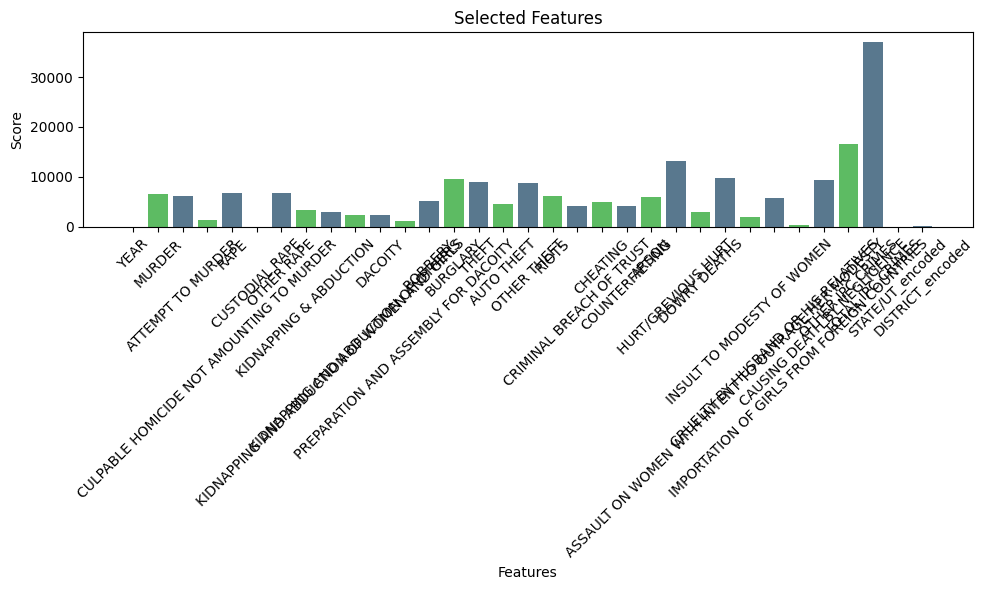

In [38]:
colors = ['#59788E','#5DBB63']
plt.figure(figsize=(10, 6))
plt.bar(selected_features, selector.scores_[selected_indices], color=colors)
plt.xlabel('Features')
plt.ylabel('Score')
plt.title('Selected Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   YEAR                                                 9840 non-null   int64
 1   MURDER                                               9840 non-null   int64
 2   ATTEMPT TO MURDER                                    9840 non-null   int64
 3   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9840 non-null   int64
 4   RAPE                                                 9840 non-null   int64
 5   CUSTODIAL RAPE                                       9840 non-null   int64
 6   OTHER RAPE                                           9840 non-null   int64
 7   KIDNAPPING & ABDUCTION                               9840 non-null   int64
 8   KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS          9840 non-null   int64
 9   KIDNAPPI

In [40]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 9840 entries, 0 to 9839
Series name: CRIME_LEVEL
Non-Null Count  Dtype
--------------  -----
9840 non-null   int64
dtypes: int64(1)
memory usage: 77.0 KB


In [41]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Conv1D, MaxPooling1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Flatten())
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mae',metrics=['accuracy'])  

history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

loss = model.evaluate(X_test, y_test)






Epoch 1/10


216/216 [==============================] - 8s 13ms/step - loss: 0.0810 - accuracy: 0.9544
Epoch 2/10
216/216 [==============================] - 3s 14ms/step - loss: 0.0230 - accuracy: 0.9858
Epoch 3/10
216/216 [==============================] - 3s 14ms/step - loss: 0.0180 - accuracy: 0.9858
Epoch 4/10
216/216 [==============================] - 3s 13ms/step - loss: 0.0174 - accuracy: 0.9858
Epoch 5/10
216/216 [==============================] - 3s 13ms/step - loss: 0.0179 - accuracy: 0.9858
Epoch 6/10
216/216 [==============================] - 3s 13ms/step - loss: 0.0144 - accuracy: 0.9858
Epoch 7/10
216/216 [==============================] - 3s 13ms/step - loss: 0.0130 - accuracy: 0.9858
Epoch 8/10
216/216 [==============================] - 3s 13ms/step - loss: 0.0176 - accuracy: 0.9858
Epoch 9/10
216/216 [==============================] - 3s 13ms/step - loss: 0.0139 - accuracy: 0.9858
Epoch 10/10
93/93 [==============================] - 1s 6ms/step - loss: 0.0143 - acc

In [42]:
model.save('model.h5')